##*Twitter Suicidal-Intention Prediction with TFIDF*

By Nakshatra Singh

This notebook will show you how to build a Support Vector Classifier to predict if a tweet is suicidal-intended or not.

###**1. Imports** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 70
plt.rcParams['axes.facecolor'] = 'white'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**2. Retrieve and Inspect Dataset**

Let's download the dataset which is uploaded on my google drive. 

In [ ]:
!gdown --id 16PXPwDjZCH45jC97LxZ8_9zAvi0pI7u6 

Downloading...
From: https://drive.google.com/uc?id=16PXPwDjZCH45jC97LxZ8_9zAvi0pI7u6
To: /content/twitter-suicidal_data.csv
3.63MB [00:00, 57.2MB/s]


We'll use `pandas` to parse the csv files.  

In [ ]:
df = pd.read_csv('/content/twitter-suicidal_data.csv') 

Let's take a look at the first few rows of the table just to see what's in there.  

In [ ]:
df.head() 

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


How many tweets do we have?


In [ ]:
df.shape

(9119, 2)

Now, let's count the number of positive and negative Suicidal Intention in our dataset.

In [ ]:
df['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

Let's visualize it a little further.

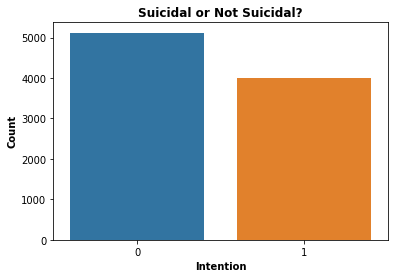

In [ ]:
sns.countplot('intention', data=df)
plt.title('Suicidal or Not Suicidal?', fontweight='bold')
plt.xlabel('Intention', fontweight='bold')
plt.ylabel('Count', fontweight='bold');

Hmm. that's almost a balanced dataset, we'll work with this.

###**3. WordCloud**

Let's have an interesting visualiztion of the most used words in our corpus and seperate them based on the class intention.

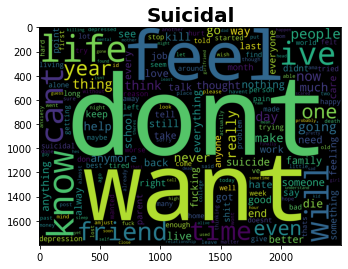

In [ ]:
# Suicide == 1 in Corpus
subset = df[df.intention==1]
text = subset.tweet.values
cloud_suicidal = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.title("Suicidal",fontsize=20, fontweight='bold')
plt.imshow(cloud_suicidal);

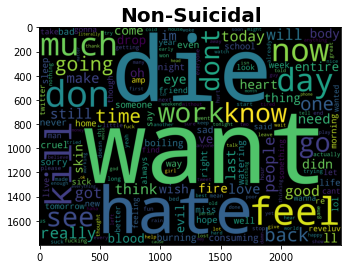

In [ ]:
# Non-Suicidal == 0 in Corpus
subset = df[df.intention==0]
text = subset.tweet.values
cloud_non_suicidal = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.title("Non-Suicidal",fontsize=20, fontweight='bold')
plt.imshow(cloud_non_suicidal);

###**4. Preprocess_Nakshatra / My own Python Script**

Here, we'll use my own python package which has a pre-written script for preprocessing textual data. Here is the [`repository`](https://github.com/nakshatrasinghh/Preprocess_Nakshatra) and we'll install that repo here directly in our colab notebook.

In [ ]:
!pip install git+https://github.com/nakshatrasinghh/Preprocess_Nakshatra.git

  Cloning https://github.com/nakshatrasinghh/Preprocess_Nakshatra.git to /tmp/pip-req-build-wzcy98nt
  Running command git clone -q https://github.com/nakshatrasinghh/Preprocess_Nakshatra.git /tmp/pip-req-build-wzcy98nt
  Created wheel for Preprocess-Nakshatra: filename=Preprocess_Nakshatra-0.0.5-cp36-none-any.whl size=5192 sha256=46684be01e1b12b42eddc5b1be85516d42e113efed64a8eb456f677c30a7ad03
  Stored in directory: /tmp/pip-ephem-wheel-cache-89qmk0wz/wheels/7c/40/7e/506590ed754a94a7d77c429bda69f1fb4a260a7d5905403d03
Successfully built Preprocess-Nakshatra


Before starting to clean our data, we'll need to download a spacy package and call some imports for the script to run.

In [ ]:
!python -m spacy download en_core_web_md
import Preprocess_Nakshatra as ps
import re 

     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=b975cda6451a72725e560e84485a11705f763cda2c451587351aa255369a23ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-ohroj7mx/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


We are ready to clean our data now.
 > Note: This script was taken from my own [`repository`](https://github.com/nakshatrasinghh/Preprocess_Nakshatra), please do check it out if you found it helpful.

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_mentions(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x 

Let's clean the tweets in our dataframe using lambda function.

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

Let's see how our final dataframe looks like.

In [ ]:
df.head() 

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


###**5. TFIDF Vectorizer**

We'll use *Tfidf Vectorizer*. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents to a matrix of TF-IDF features.

In [ ]:
tfidf = TfidfVectorizer(max_features=30000,    #top 30000 unique vocabulary words
                        ngram_range=(1, 3),    #unigram, bigram and trigram
                        analyzer='char')       #tokenization is done character by character

Let's set our model variables for training.

In [ ]:
X = tfidf.fit_transform(df['tweet'])    
y = df['intention']

Now, we set the `max_features` in Tfidf as 30000, but our dataframe contains only 10440 unique words, so the number of features are 10440. If the dataframe had more features than 30000, the number of features/columns would be 30000.

In [ ]:
X.shape

(9119, 10440)

Now, let's split our dataframe into training and validation splits.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

###**6. Linear SVC**

For our first classifier, we'll use LinearSVC from sklearn.

In [ ]:
clf = LinearSVC(max_iter=50000)    #The maximum number of iterations for the quadratic programming problem to cycle through to optimize.
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=50000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Displaying the classification report for the first classifier.

In [ ]:
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1060
           1       0.91      0.91      0.91       764

    accuracy                           0.93      1824
   macro avg       0.92      0.92      0.92      1824
weighted avg       0.93      0.93      0.93      1824



###**7. SVC**

For our second classifier, we'll use SVC from sklearn.

In [ ]:
clf2 = SVC(max_iter=50000)    #The maximum number of iterations for the quadratic programming problem to cycle through to optimize.
clf2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=50000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Displaying the classification report for the second classifier.

In [ ]:
y_pred2 = clf2.predict(X_val)
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1060
           1       0.95      0.88      0.91       764

    accuracy                           0.93      1824
   macro avg       0.93      0.92      0.93      1824
weighted avg       0.93      0.93      0.93      1824



###**8. Predictions**

Now since we have trained our model, we'll use both our models for predicting some of our own intentions. Let's try predicting a non-suicidal intention text.

In [ ]:
x = 'no one cares about me. I will die alone'
x = get_clean(x)
vec = tfidf.transform([x])
print(clf.predict(vec), clf2.predict(vec))     # First classifier and Second Classifier 

[1] [1]


Let's see the predictions for a suicidal intention text.

In [ ]:
x = 'Today I am so happy, thanks a lot for making my day special'
x = get_clean(x)
vec = tfidf.transform([x])
print(clf.predict(vec), clf2.predict(vec))     # First classifier and Second Classifier

[0] [0]


###**9. Summary**

We see both the classifier are giving us the same results and even the classification reports are very similar.

The LinearSVC class is based on the liblinear library, which Uses a coordinate descent optimization (COD) algorithm for linear SVMs.

1. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).

The SVC class is based on the libsvm library, which implements the Sequential minimal optimization (SMO) algorithm for kernelized support vector machines (SVMs), supporting classification and regression, that supports the kernel trick.

1. The training time complexity is usually between O(m2 × n) and O(m3 × n).
2. LinearSVC is much faster than SVC(kernel="linear").
3. In this case, we got better scores in SVC than LinearSVC .

> If I had to choose I would go with the second classifier as SVC supports kernel trick and in most general cases gives better results.
